In [1]:
import pandas as pd

# Part 1 - Data Acquisition

In [2]:
# Read data from a CSV file into a data frame
# device_fraud_count has all same values of 0, therefore dropped
df = pd.read_csv('Base.csv')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   
5           1     0.3               0.143921                         -1   
6           1     0.7               0.321554                         -1   
7           1     0.9               0.064817                         -1   
8           1     0.7               0.065938                         -1   
9           1     0.9               0.700096                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144     

# Part 2 - Data Exploration

In [3]:
import seaborn as sns

In [4]:
# Draw a heat map for all the numerical variables in the data frame
df4heatmaps = df

# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)

                                  fraud_bool    income  name_email_similarity  \
fraud_bool                          1.000000  0.045079              -0.036720   
income                              0.045079  1.000000              -0.038519   
name_email_similarity              -0.036720 -0.038519               1.000000   
prev_address_months_count          -0.026031  0.018209              -0.018186   
current_address_months_count        0.033701 -0.036985               0.050305   
customer_age                        0.062959  0.125822              -0.048902   
days_since_request                  0.000567 -0.015877              -0.007736   
intended_balcon_amount             -0.024524  0.059046               0.029040   
zip_count_4w                        0.005212 -0.080581               0.025114   
velocity_6h                        -0.016892 -0.096431               0.024881   
velocity_24h                       -0.011183 -0.101269               0.035221   
velocity_4w                 

<AxesSubplot:>

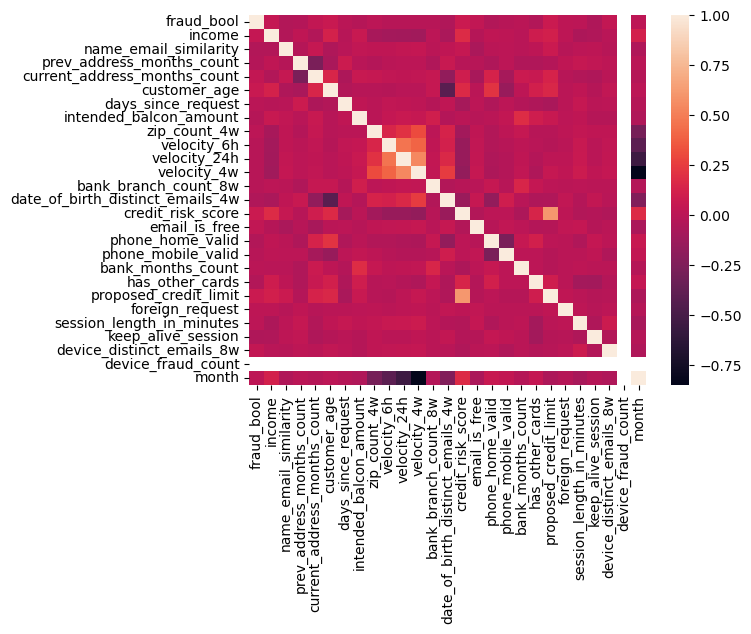

In [5]:
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Part 3 Missing Value Imputation

In [6]:
# Show the number of missing values for each variable in the data frame
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [7]:
# Drop 'device_fraud_count' since it contains the same value for all
rvar_list =['device_fraud_count']
df_sample1 = df.drop(columns=rvar_list)

In [8]:
# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical (12 categorical + 19 numerical)
cvar_list = ['fraud_bool', 'payment_type', 'employment_status', 'email_is_free',
 'housing_status', 'phone_home_valid',
 'phone_mobile_valid', 'has_other_cards',
 'foreign_request', 'source',
 'device_os', 'keep_alive_session']
nvar_list = ['income', 'name_email_similarity', 'prev_address_months_count',
 'current_address_months_count', 'customer_age', 'days_since_request',
 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w', 'month']

# Get the unique values of each categorical variables in the data frame
def column_unique_values(x_column):
  return list(x_column.unique())

df_sample1[cvar_list].apply(column_unique_values)

fraud_bool                                             [1, 0]
payment_type                             [AA, AB, AC, AD, AE]
employment_status                [CA, CB, CC, CD, CE, CF, CG]
email_is_free                                          [0, 1]
housing_status                   [BA, BB, BC, BD, BE, BF, BG]
phone_home_valid                                       [1, 0]
phone_mobile_valid                                     [0, 1]
has_other_cards                                        [0, 1]
foreign_request                                        [0, 1]
source                                    [INTERNET, TELEAPP]
device_os             [windows, other, linux, macintosh, x11]
keep_alive_session                                     [0, 1]
dtype: object

# Part 4 - Variable transformation

In [9]:
# Standardize the numerical variables 
df_sample2 = df_sample1.copy()
df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.
df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='-')
print(df_sample4.columns.values)

['income' 'name_email_similarity' 'prev_address_months_count'
 'current_address_months_count' 'customer_age' 'days_since_request'
 'intended_balcon_amount' 'zip_count_4w' 'velocity_6h' 'velocity_24h'
 'velocity_4w' 'bank_branch_count_8w' 'date_of_birth_distinct_emails_4w'
 'credit_risk_score' 'bank_months_count' 'proposed_credit_limit'
 'session_length_in_minutes' 'device_distinct_emails_8w' 'month'
 'fraud_bool-0' 'fraud_bool-1' 'payment_type-AA' 'payment_type-AB'
 'payment_type-AC' 'payment_type-AD' 'payment_type-AE'
 'employment_status-CA' 'employment_status-CB' 'employment_status-CC'
 'employment_status-CD' 'employment_status-CE' 'employment_status-CF'
 'employment_status-CG' 'email_is_free-0' 'email_is_free-1'
 'housing_status-BA' 'housing_status-BB' 'housing_status-BC'
 'housing_status-BD' 'housing_status-BE' 'housing_status-BF'
 'housing_status-BG' 'phone_home_valid-0' 'phone_home_valid-1'
 'phone_mobile_valid-0' 'phone_mobile_valid-1' 'has_other_cards-0'
 'has_other_cards-1' 'f

In [10]:
# Remove the redundant dummies (Step 2 of dummy coding)
rdummies = ['fraud_bool-0','payment_type-AA',
 'employment_status-CA', 'email_is_free-0',
 'housing_status-BA', 'phone_home_valid-0',
 'phone_mobile_valid-0', 'has_other_cards-0',
 'foreign_request-0',
 'source-INTERNET', 'device_os-linux',
 'keep_alive_session-0']
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample5.columns.values)

['income' 'name_email_similarity' 'prev_address_months_count'
 'current_address_months_count' 'customer_age' 'days_since_request'
 'intended_balcon_amount' 'zip_count_4w' 'velocity_6h' 'velocity_24h'
 'velocity_4w' 'bank_branch_count_8w' 'date_of_birth_distinct_emails_4w'
 'credit_risk_score' 'bank_months_count' 'proposed_credit_limit'
 'session_length_in_minutes' 'device_distinct_emails_8w' 'month'
 'fraud_bool-1' 'payment_type-AB' 'payment_type-AC' 'payment_type-AD'
 'payment_type-AE' 'employment_status-CB' 'employment_status-CC'
 'employment_status-CD' 'employment_status-CE' 'employment_status-CF'
 'employment_status-CG' 'email_is_free-1' 'housing_status-BB'
 'housing_status-BC' 'housing_status-BD' 'housing_status-BE'
 'housing_status-BF' 'housing_status-BG' 'phone_home_valid-1'
 'phone_mobile_valid-1' 'has_other_cards-1' 'foreign_request-1'
 'source-TELEAPP' 'device_os-macintosh' 'device_os-other'
 'device_os-windows' 'device_os-x11' 'keep_alive_session-1']


# Part 5 - Data Partiton

In [11]:
from sklearn.model_selection import train_test_split

# test_size specifies the percentage for the test partition
df4partition = df_sample5
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

# Part 6 - Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Separate the predictor values and the DV values into X and y respectively
DV = 'fraud_bool-1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# A user-defined function summary_coef
# to display the estimated coefficients of a model candidate obtained by the Logistic Regression analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

In [13]:
# Run Logistic regression with k-fold cross validation with k=5
kfolds = 5

# Here we specify within which range of the penalty levels we will search for the optimal penalty level, 
# i.e., the level that leads to the best model candidate
# We search the optimal alpha within [min_alpha, max_alpha]
min_alpha = 0.001
max_alpha = 100

# We further discretize the continuous alpha range [min_alpha, max_alpha] into n individual points of alpha
# We train n model candidates each of which corresponds to one individual alpha point
n_candidates = 1000

import numpy as np

# We store the list of individual alpha points into alpha_list
alpha_list = list(np.linspace(min_alpha, max_alpha, num=n_candidates))

# C_list is the element-wise inverse of alpha_list. It is required as one of the paramater values for LogisticRegressionCV
C_list = list(1/np.linspace(min_alpha, max_alpha, num=n_candidates))

# Set n_jobs to be -1 to run LogisticRegressionCV on all CPU cores.
clf_optimal = LogisticRegressionCV(Cs=C_list, cv=kfolds, penalty='l1', solver='saga', max_iter=4000, random_state=1, n_jobs=-1).fit(X,y)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

                                         0
income                            0.284018
name_email_similarity            -0.348506
prev_address_months_count        -0.356059
current_address_months_count      0.020724
customer_age                      0.251899
days_since_request                0.045202
intended_balcon_amount           -0.162510
zip_count_4w                      0.110875
velocity_6h                      -0.027485
velocity_24h                      0.036334
velocity_4w                       0.000000
bank_branch_count_8w             -0.052217
date_of_birth_distinct_emails_4w -0.151051
credit_risk_score                 0.186450
bank_months_count                 0.147468
proposed_credit_limit             0.146635
session_length_in_minutes         0.008261
device_distinct_emails_8w         0.155884
month                             0.092953
payment_type-AB                   0.000000
payment_type-AC                   0.671688
payment_type-AD                   0.045124
payment_typ

In [14]:
# Display the optimal alpha that yields the final selected model (the best model candidate)
print(1/clf_optimal.C_)

[15.41626126]


In [15]:
# Calcuate the error rate over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted = clf_optimal.predict(X_test)

# Import the metrics package
from sklearn import metrics

# Display the confusion matrix over the test partition
print(metrics.confusion_matrix(y_test_actual, y_test_predicted))

print(metrics.classification_report(y_test_actual,y_test_predicted))

# Display the accuracy over the test partition
print(clf_optimal.score(X_test, y_test_actual))

[[197674     11]
 [  2282     33]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197685
           1       0.75      0.01      0.03      2315

    accuracy                           0.99    200000
   macro avg       0.87      0.51      0.51    200000
weighted avg       0.99      0.99      0.98    200000

0.988535


# Part 8 K-Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'fraud_bool-1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# First we build a kNN model with pre-specified k
k = 5

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=k).fit(X,y)

# Report the performance over the test partition

X_test = df_testData.drop(columns=DV)
y_test = df_testData[DV]

from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model with k=5
print(metrics.roc_auc_score(y_test, model_object.predict_proba(X_test)[:, 1]))

In [17]:
# Run Nearest neighbor with k-fold cross validation
# Placeholder variable: kfolds
kfolds = 5

# We first define the search scope. k (k-th nearest neighbor) will be increased from 1 to max_k
max_k = 200

param_grid = {'n_neighbors': list(range(1, max_k+1))}

# Create a user-defined function, profit_calcuation, that calcuates the profit over a dataset 
# for which we know the actual class (e.g., acceptance/rejection upon receiving a offer) from y_value
# and the predictors values (e.g., consumers age, experience, income) from x_value
# using the probability prediction model carried by the model object model.

def profit_calculation(model, x_value, y_value):
  
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11

  # Get the decisions made by the decision rule for each observation in the dataset
  # The method predict_proba is to get the predicted probability
  # Then we compare the predicted probabilities with the decision cut-off d_cutoff
  # True means SEND, False means NOT SEND
  # list() is to convert the results into a Python list
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  
  # We put the actual class into a Python list called y
  y = list(y_value)
  
  # Get the number of observations of the dataset and put it into n_obs
  n_obs = len(y)

  # cum_profit is for cumulating the profit during the for-loop
  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_bestkNN = gridsearch.best_estimator_


KeyboardInterrupt: 

In [ ]:
# Display the optimal k (k-th nearest neighbor)
print(clf_bestkNN.n_neighbors)

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the final selected k-NN model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_bestkNN.predict_proba(X_test)[:,1]))

# Part 9 Neutral Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'fraud_bool-1'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

# Build a neural network with pre-specified penalty level alpha 
# and pre-specified number of nodes on the hidden layer hls 
alpha = 0.1
hls = 3

# Increase max_iter from 2000 to 4000 if a warning msg shows that the model does not converge
clf = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=hls, max_iter=2000, random_state=1).fit(X,y)

# A user-defined function summary_tree to display a neural network model
def summary_nn(model_object):
  coef_structure = [coef.shape for coef in model_object.coefs_]

  n_hidden_nodes = coef_structure[0][1]
  n_input_nodes = coef_structure[0][0]

  print('Neural Network Model Summary \n')
  
  print('Section 0. Penalty level alpha:', model_object.alpha)

  print('\nSection 1. Input (I) -> Hidden (H) - Weight (W): \n')

  for i in range(n_input_nodes):
    for j in range(n_hidden_nodes):
      print('I:', i+1, '-> H:', j+1, '- W:', model_object.coefs_[0][i][j])

  print('\nSection 2. Hidden (H) - Node Bias (B): \n')
  for j in range(n_hidden_nodes):
    print('H:', j+1, '- B:', model_object.intercepts_[0][j])

  print('\nSection 3. Hidden (H) -> Output (O) - Weight (W): \n')
  for j in range(n_hidden_nodes):
    print('H:', j+1, '-> O - W:', model_object.coefs_[1][j][0])
    
  print('\nSection 4. Output (O) - Node Bias (B): \n')
  print('O - B:', model_object.intercepts_[1][0])

summary_nn(clf)

In [ ]:
# Run Neural Network with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of the number of nodes on the hidden layer we will search for the best network model
min_hls = 1
max_hls = 10

# Here we specify within which range of penalty level we will search for the best network model
min_alpha = 0.0001
max_alpha = 10
n_alpha = 10

# Define the parameter grid for search
import numpy as np
param_grid = {'hidden_layer_sizes':np.arange(min_hls, max_hls), 'alpha': list(np.linspace(min_alpha, max_alpha, num=n_alpha))}

# Create a user-defined function, profit_calcuation, that calcuates the profit over a dataset 
# for which we know the actual class (e.g., acceptance/rejection upon receiving a offer) from y_value
# and the predictors values (e.g., consumers age, experience, income) from x_value
# using the probability prediction model carried by the model object model.

def profit_calculation(model, x_value, y_value):
  
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11

  # Get the decisions made by the decision rule for each observation in the dataset
  # The method predict_proba is to get the predicted probability
  # Then we compare the predicted probabilities with the decision cut-off d_cutoff
  # True means SEND, False means NOT SEND
  # list() is to convert the results into a Python list
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  
  # We put the actual class into a Python list called y
  y = list(y_value)
  
  # Get the number of observations of the dataset and put it into n_obs
  n_obs = len(y)

  # cum_profit is for cumulating the profit during the for-loop
  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=2000, random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_NN = gridsearch.best_estimator_

# Display the resulting best network modele
summary_nn(clf_NN)

In [ ]:
# Display the level of depth of the best pruned tree
## print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_NN.predict_proba(X_test)[:,1]))

print(clf_NN.predict_proba(X_test)[:,1])